In [14]:
import pandas as pd
import numpy as np
import datetime

import calmap
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', 0)

---  

In [5]:
# task1
dates = pd.date_range(start='2017-09-01', end='2017-09-15')
print(dates[2])

# task2
datelist = ['14-Sep-2017', '9-Sep-2017', '25-09-2017', '09-30-2017']
dates_to_be_searched = pd.to_datetime(datelist, infer_datetime_format=True)
print("\n", dates_to_be_searched)

# task3
print("\n", dates_to_be_searched.isin(dates))

2017-09-03 00:00:00

 DatetimeIndex(['2017-09-14', '2017-09-09', '2017-09-25', '2017-09-30'], dtype='datetime64[ns]', freq=None)

 [ True  True False False]


C:\Users\mmm_n\AppData\Local\Temp/ipykernel_4232/600304967.py:7: UserWarning: Parsing '25-09-2017' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  dates_to_be_searched = pd.to_datetime(datelist, infer_datetime_format=True)


---  

In [ ]:
data_cols  = ["sentiment", "ids", "date", "flag", "user", "text"]
data_encoding = "ISO-8859-1"
tweets = pd.read_csv('data/tweets_dataset.csv', encoding=data_encoding, names=data_cols)

In [ ]:
# tratando a data
tweets['date'] = pd.to_datetime(tweets['date'], errors='coerce')
tweets['date'].head()

In [ ]:
# verificando o intervalo do período
print(f'max date: {tweets.date.max()} \nmin date: {tweets.date.min()}')

In [ ]:
# Verificar se houve algum dia ou horário onde tiveram mais mensagens
tweets['day'] = tweets['date'].dt.date
tweets['hour'] = tweets['date'].dt.hour

---

In [18]:
dt = datetime.date.today()
print(dt)
print(dt.year)
print(dt.month)
print(dt.day)
print(dt.isoweekday())   # monday = 1
print(dt.weekday())      # monday = 0

2022-10-28
2022
10
28
5
4


In [8]:
# %a 	Weekday, short version 	Wed 	
# %A 	Weekday, full version 	Wednesday 	
# %w 	Weekday as a number 0-6, 0 is Sunday 	3 	
# %d 	Day of month 01-31 	31 	
# %b 	Month name, short version 	Dec 	
# %B 	Month name, full version 	December 	
# %m 	Month as a number 01-12 	12 	
# %y 	Year, short version, without century 	18 	
# %Y 	Year, full version 	2018
# %j 	Day number of year 001-366 	365 	
# %U 	Week number of year, Sunday as the first day of week, 00-53 	52 	
# %W 	Week number of year, Monday as the first day of week, 00-53 	52 	
# %c 	Local version of date and time 	Mon Dec 31 17:41:00 2018 	
# %C 	Century 	20 	
# %x 	Local version of date 	12/31/18 	
# %X 	Local version of time 	17:41:00
# %G 	ISO 8601 year 	2018 	
# %u 	ISO 8601 weekday (1-7) 	1 	
# %V 	ISO 8601 weeknumber (01-53) 	01

print(dt.strftime("%d/%m/%Y"))
print(dt.strftime("%b %d, %Y"))
print(dt.strftime("%B %d, %Y"))
print(dt.strftime("%a %B %d, %Y"))
print(dt.strftime("%A %B %d, %Y"))

28/10/2022
Oct 28, 2022
October 28, 2022
Fri October 28, 2022
Friday October 28, 2022


In [10]:
t = datetime.time(21, 2, 3)
print(t)
print(t.hour)
print(t.minute)
print(t.second)
print(t.microsecond)

21:02:03
21
2
3
0


In [11]:
# %H 	Hour 00-23 	17 	
# %I 	Hour 00-12 	05 	
# %p 	AM/PM 	PM 	
# %M 	Minute 00-59 	41 	
# %S 	Second 00-59 	08 	
# %f 	Microsecond 000000-999999 	548513 	
# %z 	UTC offset 	+0100 	
# %Z 	Timezone 	CST

print(t.strftime("%I:%M %p"))

09:02 PM


In [13]:
dt2 = datetime.datetime.now()
print(dt2)

2022-10-28 07:30:22.720579


In [14]:
# %c represents locale date and time.
# %X represents locale time. 
print(dt2.strftime("%c"))
print(dt2.strftime("%A %B %d %X"))
print(dt2.strftime("%A %B %d %H:%M"))

Fri Oct 28 07:30:22 2022
Friday October 28 07:30:22
Friday October 28 07:30


In [15]:
dt3 = datetime.datetime(2022, 10, 28, 10, 51, 0)
print(dt3)

2022-10-28 10:51:00


In [24]:
print(dt3)
#30 days ahead
delta = datetime.timedelta(days=30)
print('+30d \t\t\t', dt3 + delta)

#30 days back
print('-30d \t\t\t',dt3 - delta)

delta = datetime.timedelta(days= 10, hours=3, minutes=30, seconds=30)
print('+10d 3h 30min 30s \t', dt3 + delta)

delta = datetime.timedelta(weeks= 4, hours=3, minutes=30, seconds=30)
print('+4w 3h 30min 30s \t', dt3 + delta)

2022-10-28 10:51:00
+30d 			 2022-11-27 10:51:00
-30d 			 2022-09-28 10:51:00
+10d 3h 30min 30s 	 2022-11-07 14:21:30
+4w 3h 30min 30s 	 2022-11-25 14:21:30


In [27]:
date1 = datetime.date(2022, 10, 25)
date2 = datetime.date(2021, 12, 25)
diff = date1- date2

print(diff.days)

304


---

In [16]:
df=pd.DataFrame({"A_":["2019-01-01", "2019-02-03", "2019-07-03", "2019-10-26"],
                 "B_":["2019-03-02", "2019-08-01", "2019-10-01", "2019-12-25"],
                 "Qty":[3, 1, 5, 9] })

df['A'] = pd.to_datetime(df['A_'])
df['B'] = pd.to_datetime(df['B_'])
df.dtypes

A_             object
B_             object
Qty             int64
A      datetime64[ns]
B      datetime64[ns]
dtype: object

In [17]:
df['C'] = df['B'] - df['A']
df['D'] = (df['B'] - df['A']).dt.days
df['E'] = df['B'] - pd.DateOffset(months=3)
df['F'] = df['B'] - pd.DateOffset(months=-3)
df

,A_,B_,Qty,A,B,C,D,E,F
0,2019-01-01,2019-03-02,3,2019-01-01,2019-03-02,60 days,60,2018-12-02,2019-06-02
1,2019-02-03,2019-08-01,1,2019-02-03,2019-08-01,179 days,179,2019-05-01,2019-11-01
2,2019-07-03,2019-10-01,5,2019-07-03,2019-10-01,90 days,90,2019-07-01,2020-01-01
3,2019-10-26,2019-12-25,9,2019-10-26,2019-12-25,60 days,60,2019-09-25,2020-03-25


In [18]:
df.drop(columns=['A_', 'B_'], inplace=True)
df['A_day'] = df['A'].dt.day
df['A_mth'] = df['A'].dt.month
df['A_year'] = df['A'].dt.year
df['A_qtr'] = df['A'].dt.quarter
df['A_dName'] = df['A'].dt.day_name()
df['A_doW'] = df['A'].dt.dayofweek
df['A_doY'] = df['A'].dt.dayofyear
df['A_diM'] = df['A'].dt.daysinmonth
df['A_mName'] = df['A'].dt.month_name()
df['A_YQ'] = df['A'].dt.to_period('Q')
df['A_YM'] = df['A'].dt.to_period('M')
df['A_YW'] = df['A'].dt.to_period('W')
df['A_Yw.'] = df['A'].dt.strftime('%y_%V')
df['A_is_weekend'] = np.where(df['A'].dt.dayofweek < 5, 0, 1)

df

,Qty,A,B,C,D,E,F,A_day,A_mth,A_year,A_qtr,A_dName,A_doW,A_doY,A_diM,A_mName,A_YQ,A_YM,A_YW,A_Yw.,A_is_weekend
0,3,2019-01-01,2019-03-02,60 days,60,2018-12-02,2019-06-02,1,1,2019,1,Tuesday,1,1,31,January,2019Q1,2019-01,2018-12-31/2019-01-06,19_01,0
1,1,2019-02-03,2019-08-01,179 days,179,2019-05-01,2019-11-01,3,2,2019,1,Sunday,6,34,28,February,2019Q1,2019-02,2019-01-28/2019-02-03,19_05,1
2,5,2019-07-03,2019-10-01,90 days,90,2019-07-01,2020-01-01,3,7,2019,3,Wednesday,2,184,31,July,2019Q3,2019-07,2019-07-01/2019-07-07,19_27,0
3,9,2019-10-26,2019-12-25,60 days,60,2019-09-25,2020-03-25,26,10,2019,4,Saturday,5,299,31,October,2019Q4,2019-10,2019-10-21/2019-10-27,19_43,1


In [19]:
date_from = pd.Timestamp(datetime.date(2019,1,15))
date_to = pd.Timestamp(datetime.date(2019,3,1))

df[ (df['A'] > date_from) &
    (df['A'] < date_to)]

,Qty,A,B,C,D,E,F,A_day,A_mth,A_year,A_qtr,A_dName,A_doW,A_doY,A_diM,A_mName,A_YQ,A_YM,A_YW,A_Yw.,A_is_weekend
1,1,2019-02-03,2019-08-01,179 days,179,2019-05-01,2019-11-01,3,2,2019,1,Sunday,6,34,28,February,2019Q1,2019-02,2019-01-28/2019-02-03,19_05,1


---

<AxesSubplot:>

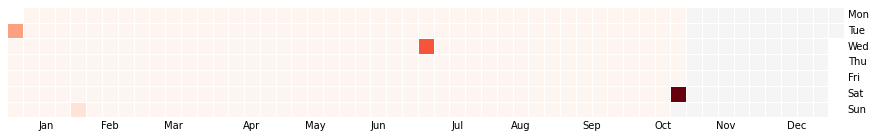

In [21]:
heatmap = df.set_index("A")

f, ax = plt.subplots(1, 1, figsize = (15, 10))
calmap.yearplot(heatmap["Qty"], year=2019, ax=ax)

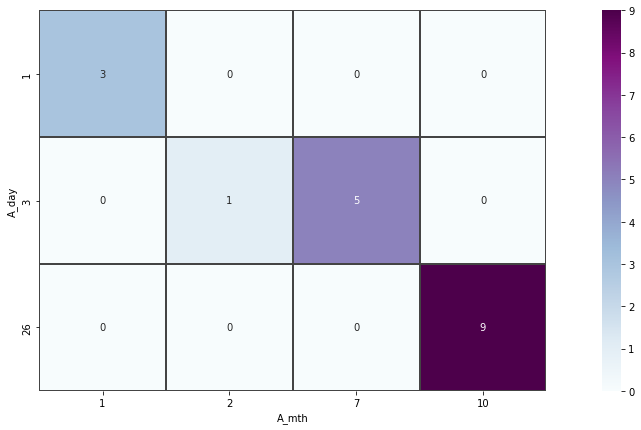

In [24]:
heatmap = df.pivot_table(columns='A_mth', index='A_day', values='Qty', aggfunc='sum', fill_value=0)

plt.figure(figsize=(20,7))
sns.heatmap(heatmap, cmap="BuPu", square=True, annot=True, fmt=',.0f',
                linewidth=0.01, linecolor="#444", cbar=True,
                vmin=heatmap.min().min(), vmax=heatmap.max().max())
plt.show();